# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v4i2l4-chol

1. 4個變數：隔夜拆款利率、許可建照數、消費者購屋貸款、房價指數

2. Lag = 4

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &0\\
a_{31} &a_{32} &a_{33} &0\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 4-variable model
By <- data %>% select(interest_rate, permit, loan, hp) %>% as.matrix

# Raw Data

In [4]:
dim(By)

[1] 119   4

In [5]:
data$Date <- as.Date(data$Date)

In [6]:
i_level <- ggplot(data, aes(x = Date, y = interest_rate))+
    geom_line()

permit_level <- ggplot(data, aes(x = Date, y = permit))+
    geom_line()

loan_level <- ggplot(data, aes(x = Date, y = loan))+
    geom_line()

sentiment_level <- ggplot(data, aes(x = Date, y = Sentiment))+
    geom_line()

hp_level <- ggplot(data, aes(x = Date, y = hp))+
    geom_line()

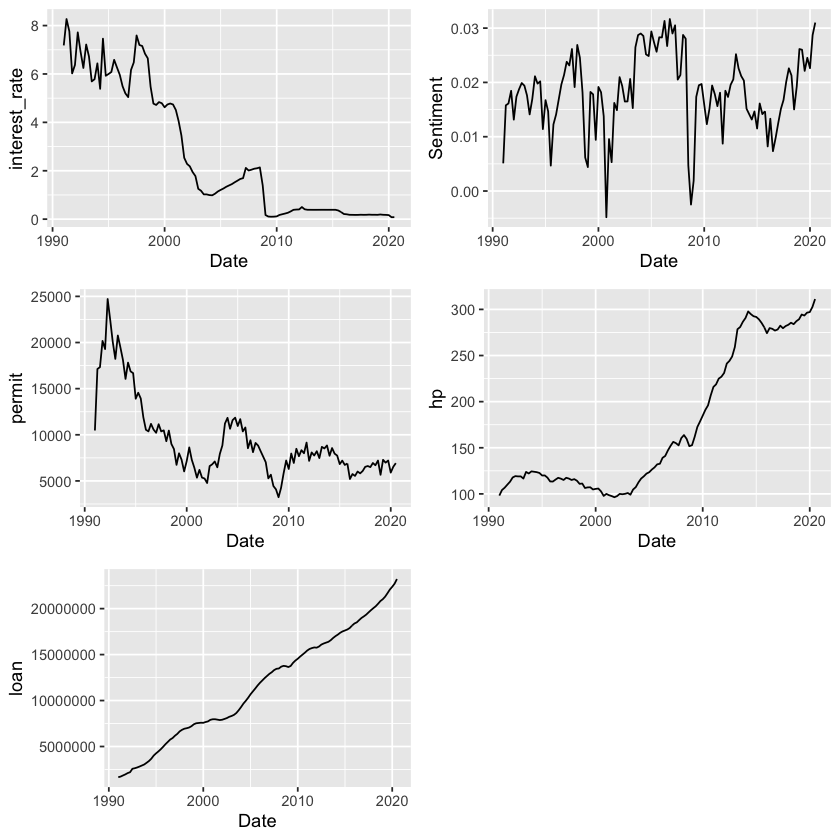

In [7]:
multiplot(i_level,permit_level,
          loan_level, sentiment_level,
          hp_level,
          cols = 2)

In [8]:
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_raw.png", 
       plot = multiplot(i_level,permit_level,
                        loan_level, sentiment_level,
                        hp_level,
                        cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

### 模型設定

In [9]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [10]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.7792324,0.000002020424,0.0000006277607,0.01080723,0.1477416,0.000004300465,-0.0000006690059,-0.008985683,0.07740527
449.7755381,0.600890919494,-0.0007642311800,78.58976236,-668.3955268,0.251886748271,0.0004799285543,-67.994415828,3311.67030502
20218.2290375,12.478502350488,1.6386807579250,2813.67695952,-23774.9169396,-7.745885319044,-0.6343886322919,-2987.887435544,11652.54915357
-0.5577022,0.000053175928,-0.0000045371856,1.30178404,-0.1032932,0.000299157240,0.0000048805458,-0.327191702,0.95676080


0.21455701,11.3676,3642.877,-0.01676047
11.36760290,1253591.5516,11408990.713,1248.40106285
3642.87705581,11408990.7134,5316474367.323,2894.96196421
-0.01676047,1248.4011,2894.962,13.05268208


0.1980526,10.49317,3362.656,-0.0154712
10.4931719,1157161.43228,10531376.043,1152.3702119
3362.6557438,10531376.04311,4907514800.605,2672.2725824
-0.0154712,1152.37021,2672.273,12.0486296


### AIC/SIC

In [11]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 37.01231

AIC,38.35075,37.62769,37.48440,37.36686
SIC,38.82035,38.47759,38.71877,38.98995
HQ,38.54142,37.97274,37.98548,38.02566


AIC SIC  HQ 
  4   2   2

### 選擇lag期數

In [12]:
# 依據AIC選擇
VAR.P = 4

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &0\\
a_{31} &a_{32} &a_{33} &0\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

In [13]:
### 4-variable model

Amat = diag(4)
# Identification Conditions

Amat[2,1]  = NA; 
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;

Bmat = diag(4)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0
NA,1,0,0
NA,NA,1,0
NA,NA,NA,1


NA,0,0,0
0,NA,0,0
0,0,NA,0
0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

* Recall 模型設定:

$$D(L)Y_t = Be_t$$

可以推得:

$$Y_t = \Phi_1 Y_{t-1} + \dots + \Phi_p Y_{t-p} + \varepsilon_t $$

1. 為 $A, B$ matrix 加上 zero constraints

2. 從$\Sigma_\varepsilon = CC'$知道 cholesky decomposition的 $C = (I-D_0)^{-1}B = A^{-1}B$ 

In [14]:
C.Prime <- chol(Sigma.OLS)

In [15]:
C <- t(C.Prime)
C

0.46320299,0.000000,0.000000,0.000000
24.54129847,1119.370035,0.000000,0.000000
7864.53695546,10019.907992,71792.930499,0.000000
-0.03618386,1.116064,-0.111478,3.434144


令 

$$
A = \left[
\begin{array}{ccccc}
1 &0 &0 &0\\
a_{21} &1 &0 &0\\
a_{31} &a_{32} &1 &0\\
a_{41} &a_{42} &a_{43} &1\\
\end{array}
\right]
$$

$$
B = \left[
\begin{array}{ccccc}
\sigma_1 &0 &0 &0\\
0 &\sigma_2 &0 &0\\
0 &0 &\sigma_3 &0\\
0 &0 &0 &\sigma_4\\
\end{array}
\right]
$$

則

$$
AC = \left[
\begin{array}{ccccc}
1 &0 &0 &0\\
a_{21} &1 &0 &0\\
a_{31} &a_{32} &1 &0\\
a_{41} &a_{42} &a_{43} &1\\
\end{array}
\right]
\left[
\begin{array}{ccccc}
c_{11} &0 &0 &0\\
c_{21} &c_{22} &0 &0\\
c_{31} &c_{32} &c_{33} &0\\
c_{41} &c_{42} &c_{43} &c_{44}\\
\end{array}
\right]
\\=
\left[
\begin{array}{ccccc}
c_{11} &0 &0 &0\\
a_{21}c_{11}+c_{21} &c_{22} &0 &0\\
a_{31}c_{11}+a_{32}c_{21}+c_{31} &a_{32}c_{22}+c_{32} &c_{33} &0\\
a_{41}c_{11}+a_{42}c_{21}+a_{43}c_{31}+c_{41} &a_{42}c_{22}+a_{43}c_{32}+c_{42} &a_{43}c_{33}+c_{43} &c_{44}\\
\end{array}
\right]
=B
$$

也就是要解以下的線性系統:

共六條方程式

In [16]:
A0 <- Amat
A0[2,1] <- -C[2,1]/C[1,1]
A0[3,2] <- -C[3,2]/C[2,2]
A0[3,1] <- (-C[3,1]+(C[2,1]*C[3,2]/C[2,2]))/C[1,1]

A0[4,3] <- -C[4,3]/C[3,3]
A0[4,2] <- (-C[4,2]+C[3,2]*C[4,3]/C[3,3])/C[2,2]
A0[4,1] <- (-1/C[1,1])*( (C[3,2]*C[4,3]*C[2,1]/C[3,3] - C[4,2]*C[2,1])/C[2,2] - (C[4,3]*C[3,1]/C[3,3]) + C[4,1] )

In [17]:
B0 <- Bmat
B0[1,1] <- C[1,1]
B0[2,2] <- C[2,2]
B0[3,3] <- C[3,3]
B0[4,4] <- C[4,4]

### Note: Solving system of linear equations

由於 $B, C$已知，又$AC = B$，故$A = BC^{-1}$

In [18]:
B0 <- diag(diag(C), ncol = 4, nrow = 4)
B0

0.463203,0.00,0.00,0.000000
0.000000,1119.37,0.00,0.000000
0.000000,0.00,71792.93,0.000000
0.000000,0.00,0.00,3.434144


In [19]:
A0 <- B0 %*% solve(C)
A0

1.0000000,0.000000000,0.000000000000,0
-52.9817355,1.000000000,0.000000000000,0
-16504.3373038,-8.951381290,1.000000000000,0
0.1053145,-0.001010946,0.000001552771,1


In [20]:
SVAR_AB_est <- list("A0.svar" = A0, "B0.svar" = B0)

## IRF (without Bootstrap C.I.)

In [21]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 16) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:4){
    for(i in 1:4){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [22]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))

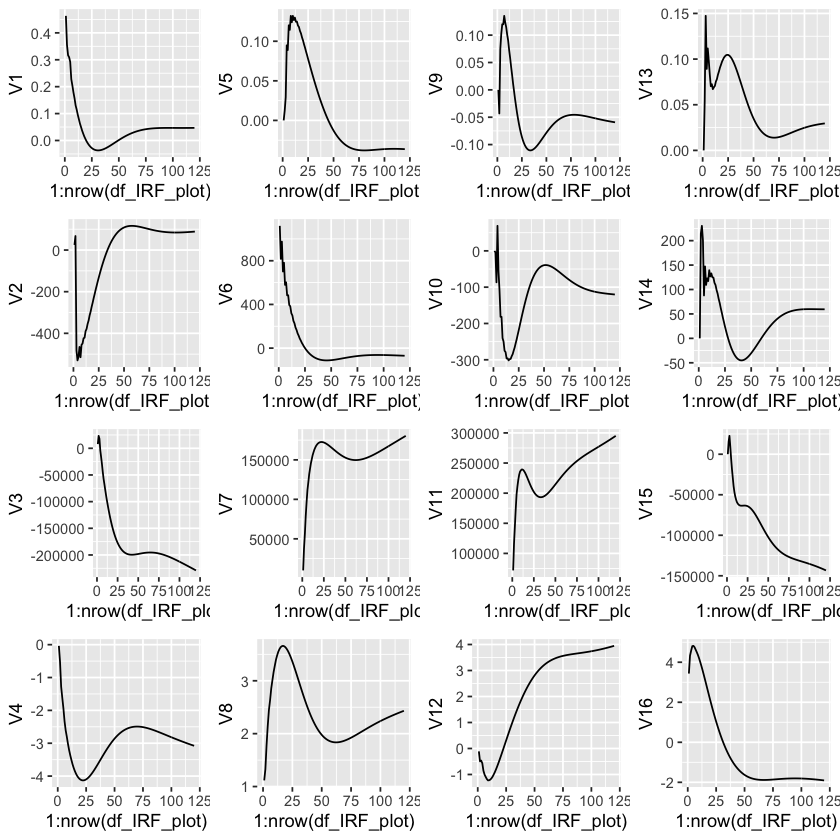

In [23]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

* 看(row4,col3)
    
    * demand shock對房價的影響是負的 -> 不合理
    
    * 但是短期是負的，長期是正的，可能合理
    

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [24]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###

    Y_pseudo     = VAR.Y(Y.sim, VAR.P)        # 設定 Y
    X_pseudo     = VAR.X(Y.sim, VAR.P)        # 設定 X
    Coef.OLS_pseudo    = VAR.OLS(Y_pseudo, X_pseudo, CONST)
    Sigma.OLS_pseudo   = VAR.Sigma.OLS(Y_pseudo, X_pseudo, Coef.OLS_pseudo, CONST)
    C.Prime_pseudo <- chol(Sigma.OLS_pseudo)
    C_pseudo <- t(C.Prime_pseudo)
    B0_pseudo <- diag(diag(C_pseudo), ncol = 4, nrow = 4)
    A0_pseudo <- B0_pseudo %*% solve(C_pseudo)
    SVAR_AB_est.sim <- list("A0.svar" = A0_pseudo, "B0.svar" = B0_pseudo)
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 115  16

[1]  4 16

[1] 115   4

In [26]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v4i2l4-chol.rds")
#```

In [27]:
df_IRF.sim <- read_rds("df_IRF.sim_v4i2l4-chol.rds")

In [28]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4632030,24.541298,7864.537,-0.03618386,0.00000000,1119.3700,10019.91,1.116064,0.00000000,0.00000,71792.93,-0.111478,0.00000000,0.00000,0.000,3.434144
0.3118640,-2.834725,41495.370,-0.35948092,0.06597119,652.4305,28680.03,1.046378,-0.07139584,39.69762,119179.47,-1.015907,0.07494252,134.51924,15125.647,4.189300
0.2557337,-498.845468,56870.990,-1.27432575,-0.02701987,702.0357,38969.31,1.451342,0.12720061,48.71002,141136.03,-1.235659,0.09206531,113.87143,17649.418,4.738570
0.3371090,-484.510516,58699.402,-1.00637670,0.04345642,312.2539,61049.75,1.945176,0.18273162,181.07697,175198.95,-1.196928,0.04316694,126.85449,1827.949,4.260590
0.3555895,-415.445440,68537.930,-1.39381116,0.02787997,496.1360,70803.75,2.461971,0.17576125,-58.27991,213198.99,-1.417696,0.06276763,62.79155,-15339.717,4.262130
0.3121071,-495.795111,67104.133,-1.98979399,0.10738620,313.8188,76860.46,2.747453,0.20163831,-208.63034,239403.67,-1.286012,0.01157873,140.52885,-26159.871,4.020573


### 畫IRF & Bootstrap C.I.

In [29]:
df_IRF_plot.BS.L <- matrix(NA, 120, 16)
df_IRF_plot.BS.U <- matrix(NA, 120, 16)
df_IRF_plot.BS.Median <- matrix(NA, 120, 16)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 16)
for(col in 1:16){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [30]:
ind <- 0
for(i in 1:4){
  for(j in 1:4){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [31]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock3
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock4
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

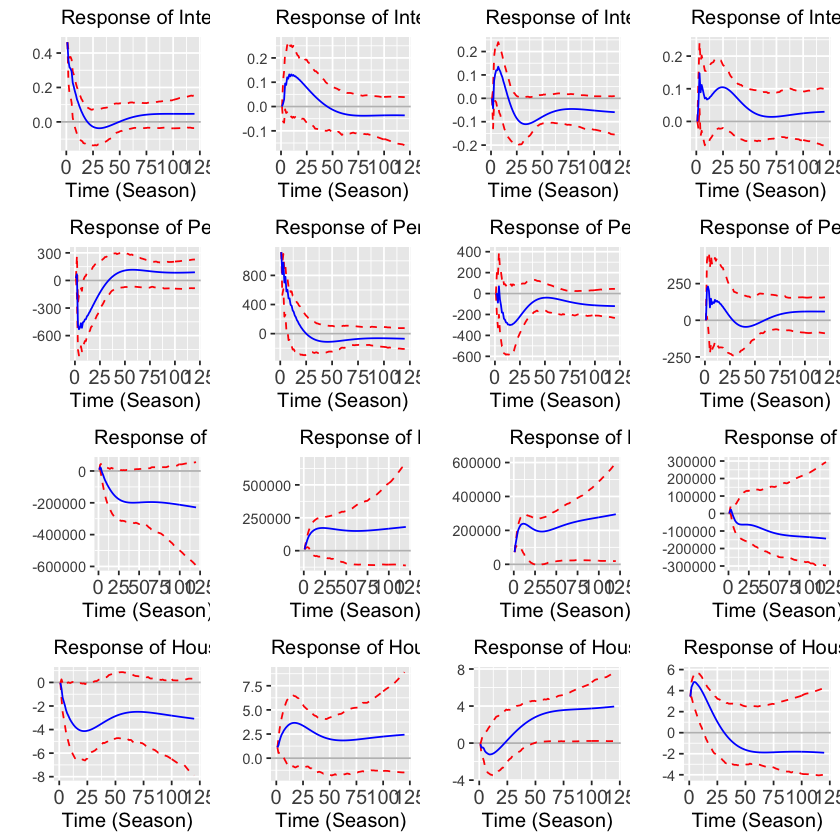

In [32]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

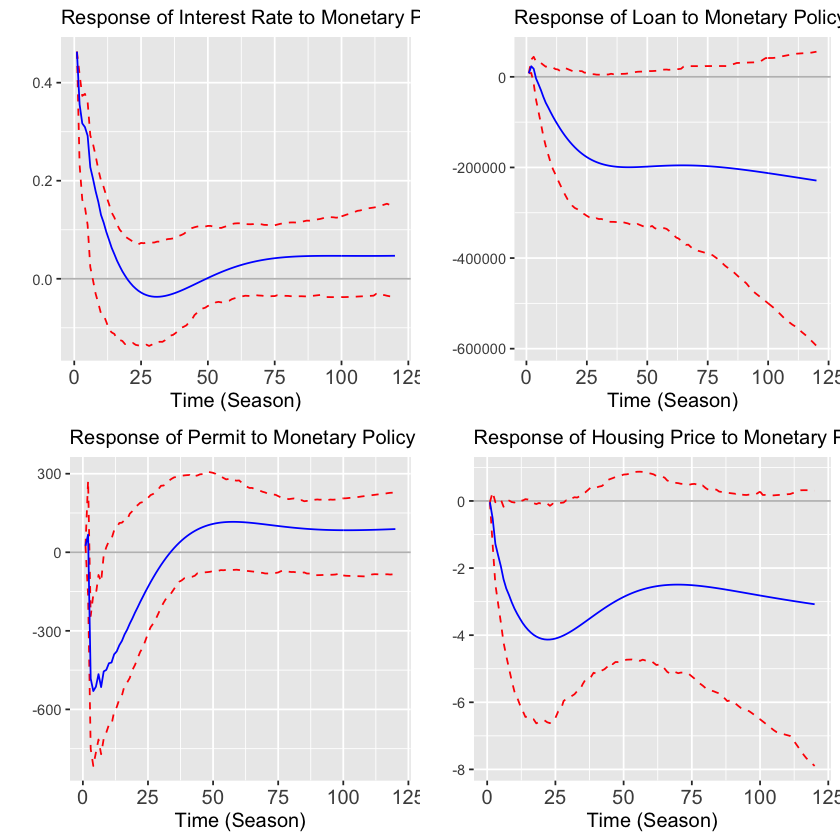

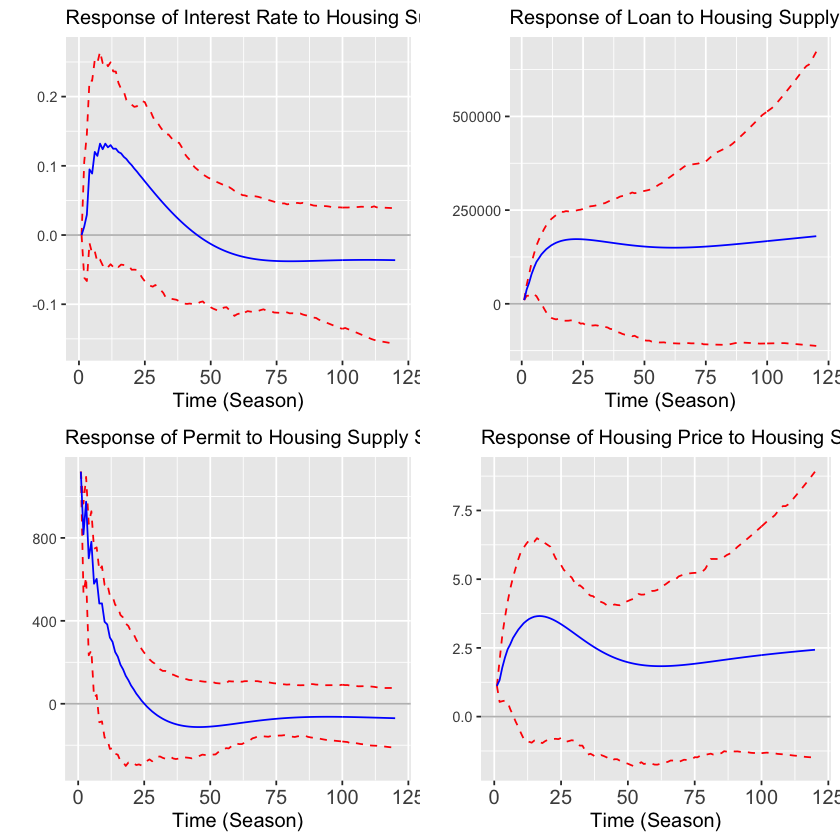

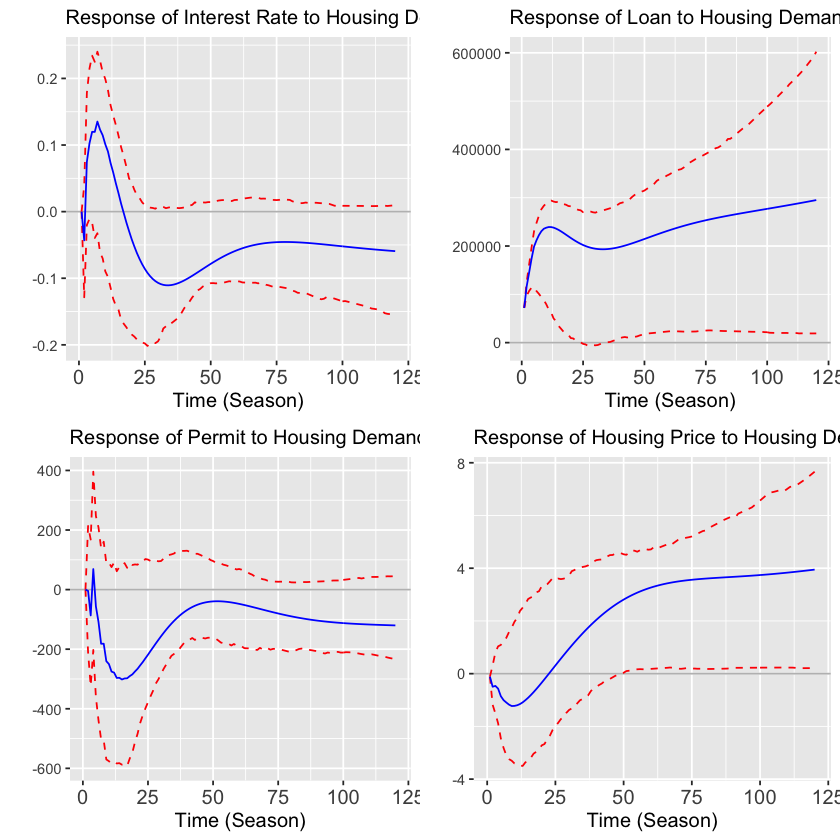

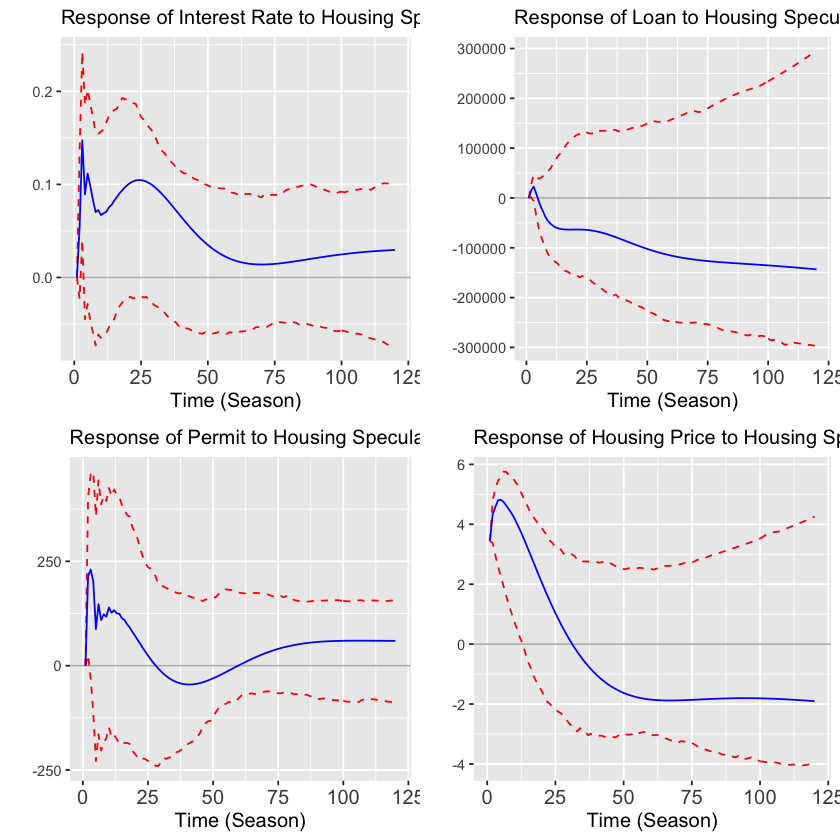

In [33]:
# For shock 1
multiplot(p1,p2,p3,p4,
          cols = 2)
# For shock 2
multiplot(p5,p6,p7,p8,
          cols = 2)
# For shock 3
multiplot(p9,p10,p11,p12,
          cols = 2)
# For shock 4
multiplot(p13,p14,p15,p16,
          cols = 2)

In [34]:
# save plot
# shock 1
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 1
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_IRF_shock2.png", 
       plot = multiplot(p5,p6,p7,p8, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_IRF_shock3.png", 
       plot = multiplot(p9,p10,p11,p12, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_IRF_shock4.png", 
       plot = multiplot(p13,p14,p15,p16, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [35]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 4, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
head(SVAR_AB_VarDecomp*100)
tail(SVAR_AB_VarDecomp*100)

h=1,0.01003067,9.542865,0.09520911,90.35190
h=2,0.78903850,8.835525,0.75691968,89.61852
h=3,3.17156974,10.296849,0.78807707,85.74350
h=4,4.98708890,11.900281,0.87608703,82.23654
h=5,6.66709685,13.488772,1.22477579,78.61936
h=6,8.57152501,14.787970,1.57832355,75.06218


h=115,32.67473,21.48506,28.86087,16.97934
h=116,32.61910,21.43961,29.02875,16.91253
h=117,32.56456,21.39488,29.19397,16.84660
h=118,32.51104,21.35082,29.35660,16.78154
h=119,32.45851,21.30740,29.51673,16.71735
h=120,32.40692,21.26461,29.67443,16.65403


In [36]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hs = V2,
           hd = V3,
           sp = V4) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,9.54,0.10,90.35
2,0.79,8.84,0.76,89.62
4,4.99,11.90,0.88,82.24
8,12.02,17.32,2.16,68.50
12,18.00,21.52,2.74,57.74
20,27.95,27.35,2.26,42.44
40,40.80,29.67,5.72,23.81
60,37.12,25.00,17.36,20.52
80,34.84,23.17,22.90,19.09


In [37]:
library(xtable)

In [38]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 14:57:05 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
period & mp & hs & hd & sp \\ 
  \hline
1 & 0.01 & 9.54 & 0.10 & 90.35 \\ 
  2 & 0.79 & 8.84 & 0.76 & 89.62 \\ 
  4 & 4.99 & 11.90 & 0.88 & 82.24 \\ 
  8 & 12.02 & 17.32 & 2.16 & 68.50 \\ 
  12 & 18.00 & 21.52 & 2.74 & 57.74 \\ 
  20 & 27.95 & 27.35 & 2.26 & 42.44 \\ 
  40 & 40.80 & 29.67 & 5.72 & 23.81 \\ 
  60 & 37.12 & 25.00 & 17.36 & 20.52 \\ 
  80 & 34.84 & 23.17 & 22.90 & 19.09 \\ 
  120 & 33.23 & 21.93 & 27.21 & 17.62 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [39]:
print(tab_VD, file="result/table/SVAR_v4i2l4-chol.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [40]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  16

In [41]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,10465.00,1658483,98.1600
2,8.270000,17129.00,1728606,104.1600
3,7.766667,17332.00,1848549,106.6800
4,6.022667,20174.00,1965070,109.9900
,6.546978,17709.51,2097083,111.5367
,6.548224,20063.68,2272380,114.5922


[1] 119   4

[1] 119   4

In [42]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,loan,hp
1,0.0000000,0.000,0.00,0.000000
2,0.0000000,0.000,0.00,0.000000
3,0.0000000,0.000,0.00,0.000000
4,0.0000000,0.000,0.00,0.000000
5,-0.1736446,1580.492,12142.46,1.673338
6,1.1704428,4648.324,-69255.67,3.227821


In [43]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,5,9,13)])

NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
-0.1736446,-9.199994,-2948.242,0.01356453
1.1525027,42.914202,13092.297,0.09339758


In [44]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
tail(cbind((By-SVAR_AB_Hist.c0)[,4], 
      (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4]))

114,-14.02974,0.01484236
115,-18.27991,-0.03558198
116,-18.29869,-0.04407730
117,-20.87632,-0.43752481
118,-18.49303,-0.71936035
119,-13.04904,-0.50194373


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



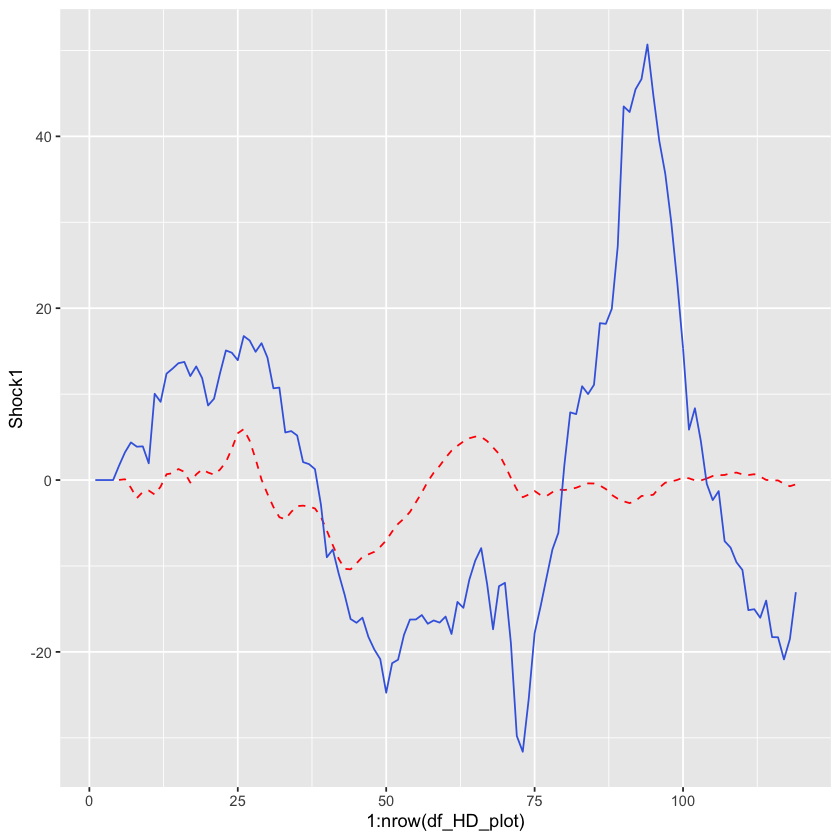

In [45]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')



### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



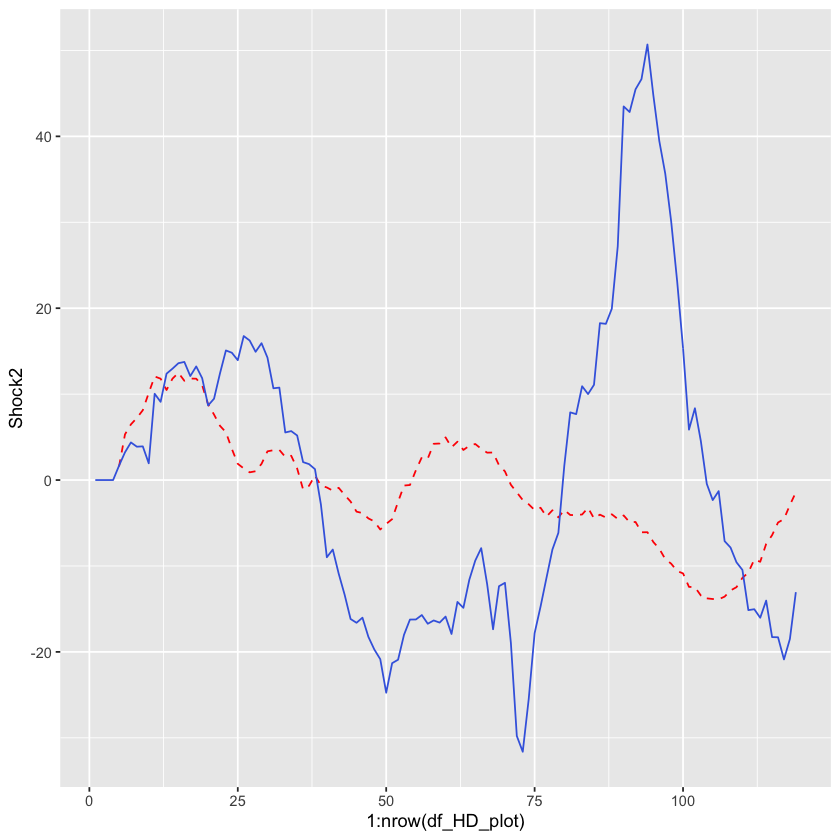

In [46]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(2,6,10,14)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



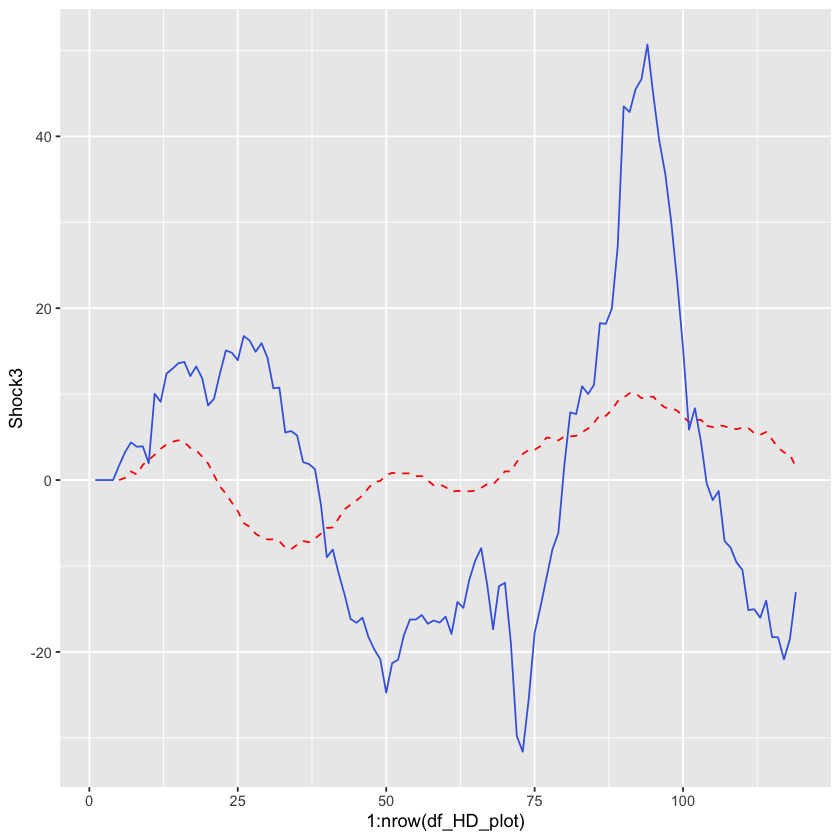

In [47]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(3,7,11,15)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



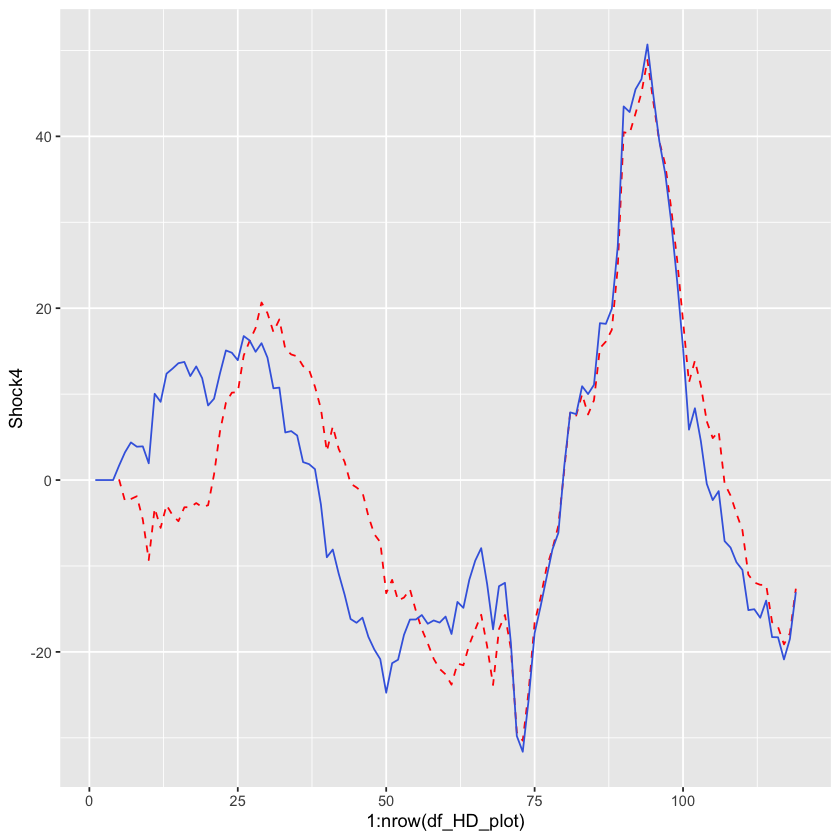

In [48]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(4,8,12,16)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [49]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [50]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,4],
                   SVAR_AB_HistDecomp[,13],
                   SVAR_AB_HistDecomp[,14],
                   SVAR_AB_HistDecomp[,15],
                   SVAR_AB_HistDecomp[,16])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hs", "hd", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-14.02974,0.01484236,-7.434156,5.593674,-12.20410
2019Q3,2019,3,-18.27991,-0.03558198,-6.416228,4.721084,-16.54918
2019Q4,2019,4,-18.29869,-0.04407730,-4.942829,3.772263,-17.08405
2020Q1,2020,1,-20.87632,-0.43752481,-4.537714,3.224101,-19.12518
2020Q2,2020,2,-18.49303,-0.71936035,-2.907520,2.964517,-17.83067
2020Q3,2020,3,-13.04904,-0.50194373,-1.427550,1.523692,-12.64324


In [51]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

In [52]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),-1.058046,13.54501,3.7140243,90.532083
房價持平期(1991Q1-2002Q4),6.386013,34.75300,9.5779163,4.866322
房價上升期(2003Q1-2020Q3),-3.646868,-11.46664,0.4807774,94.151780


In [53]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 14:57:13 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Supply Shock & Housing Demand Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & -1.06 & 13.55 & 3.71 & 90.53 \\ 
  房價持平期(1991Q1-2002Q4) & 6.39 & 34.75 & 9.58 & 4.87 \\ 
  房價上升期(2003Q1-2020Q3) & -3.65 & -11.47 & 0.48 & 94.15 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [54]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/SVAR_v4i2l4-chol_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [55]:
xlab <- lubridate::yq(df_HD$Time)

In [56]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [57]:
# save shock 1
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/SVAR_v4i2l4-chol_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")